In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook


In [137]:
antifraud = pd.read_csv("./src/antifraud.log", names=['time', 'description', 'row'], parse_dates=['time'])
bfs_antifraud = pd.read_csv("./src/antifraud_bfs.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud = pd.read_csv("./src/bi_antifraud.log", names=['time', 'description', 'row'], parse_dates=['time'])

In [138]:
intervals = pd.DataFrame()
intervals['exists_edge'] = (antifraud['time'] - antifraud['time'].shift(1))
intervals['bfs_d1'] = (bfs_antifraud['time'] - bfs_antifraud['time'].shift(1))
intervals['bi_bfs_d1'] = (bi_antifraud['time'] - bi_antifraud['time'].shift(1))
intervals = intervals.drop(0,0)

In [139]:
intervals['sec_exists_edge'] = pd.Series()
intervals['sec_bfs_d1'] = pd.Series()
intervals['sec_bi_bfs_d1'] = pd.Series()
for i in range(1, intervals.shape[0]):
    intervals['sec_exists_edge'].ix[i] = intervals['exists_edge'].ix[i].total_seconds()
    intervals['sec_bfs_d1'].ix[i] = intervals['bfs_d1'].ix[i].total_seconds()
    intervals['sec_bi_bfs_d1'].ix[i] = intervals['bi_bfs_d1'].ix[i].total_seconds()

<IPython.core.display.Javascript object>


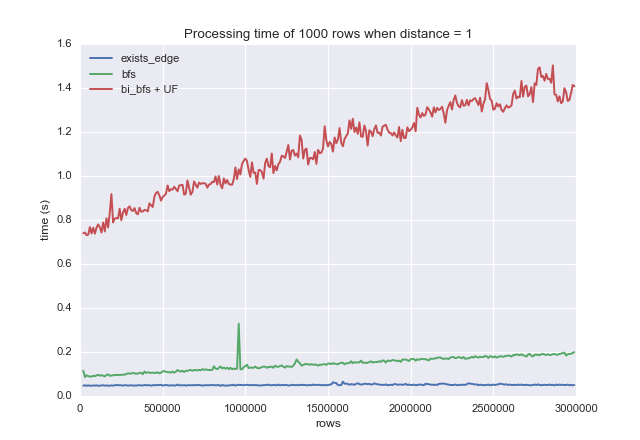

In [146]:
plt.figure()
plt.plot(antifraud['row'].ix[1:], intervals['sec_exists_edge'], label='exists_edge')
plt.plot(antifraud['row'].ix[1:], intervals['sec_bfs_d1'], label='bfs')
plt.plot(antifraud['row'].ix[1:], intervals['sec_bi_bfs_d1'], label='bi_bfs + UF')
plt.title('Processing time of 1000 rows when distance = 1')
plt.ylabel('time (s)')
plt.xlabel('rows')
plt.legend(loc=2)

In [141]:
antifraud2 = pd.read_csv("./src/antifraud2.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud2 = pd.read_csv("./src/bi_antifraud2.log", names=['time', 'description', 'row'], parse_dates=['time'])

In [142]:
intervals2 = pd.DataFrame()
intervals2['bfs_d2'] = (antifraud2['time'] - antifraud2['time'].shift(1))
intervals2['bi_bfs_d2'] = (bi_antifraud2['time'] - bi_antifraud2['time'].shift(1))
intervals2 = intervals2.drop(0,0)


In [143]:
intervals2['sec_bfs_d2'] = pd.Series()
intervals2['sec_bi_bfs_d2'] = pd.Series()
for i in range(1, intervals.shape[0]):
    intervals2['sec_bfs_d2'].ix[i] = intervals2['bfs_d2'].ix[i].total_seconds()
    intervals2['sec_bi_bfs_d2'].ix[i] = intervals2['bi_bfs_d2'].ix[i].total_seconds()

<IPython.core.display.Javascript object>


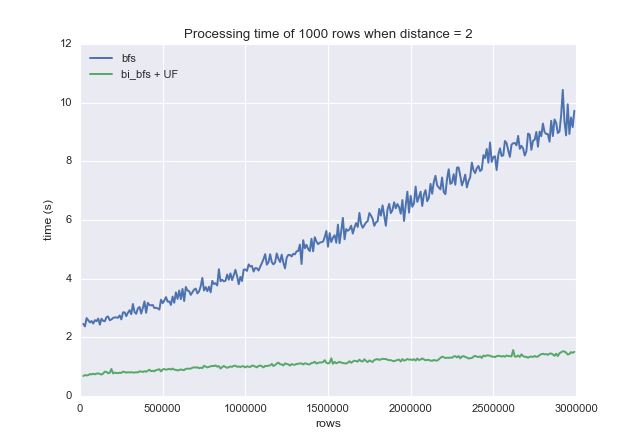

In [147]:
plt.figure()
plt.plot(antifraud2['row'].ix[1:], intervals2['sec_bfs_d2'], label='bfs')
plt.plot(antifraud2['row'].ix[1:], intervals2['sec_bi_bfs_d2'], label='bi_bfs + UF')
plt.title('Processing time of 1000 rows when distance = 2')
plt.ylabel('time (s)')
plt.xlabel('rows')
plt.legend(loc=2)

In [148]:
antifraud3 = pd.read_csv("./src/antifraud3.log", names=['time', 'description', 'row'], parse_dates=['time'])
bi_antifraud3 = pd.read_csv("./src/bi_antifraud3.log", names=['time', 'description', 'row'], parse_dates=['time'])

In [149]:
intervals3 = pd.DataFrame()
intervals3['bfs_d3'] = (antifraud3['time'] - antifraud3['time'].shift(1))
intervals3['bi_bfs_d3'] = (bi_antifraud3['time'] - bi_antifraud3['time'].shift(1))
intervals3 = intervals3.drop(0,0)

In [150]:
intervals3['sec_bfs_d3'] = pd.Series()
intervals3['sec_bi_bfs_d3'] = pd.Series()
for i in range(1, intervals.shape[0]):
    intervals3['sec_bfs_d3'].ix[i] = intervals3['bfs_d3'].ix[i].total_seconds()
    intervals3['sec_bi_bfs_d3'].ix[i] = intervals3['bi_bfs_d3'].ix[i].total_seconds()

<IPython.core.display.Javascript object>


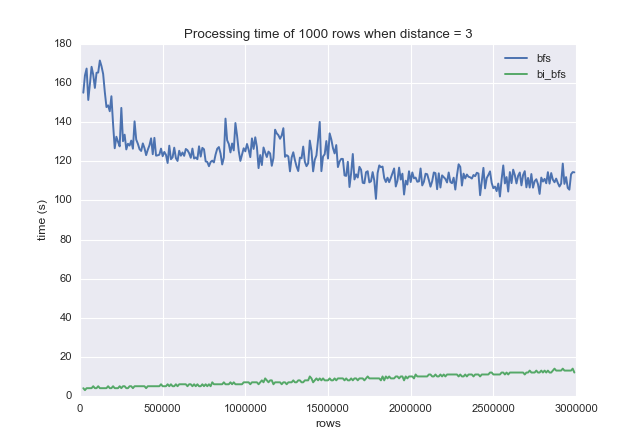

In [151]:
plt.figure()
plt.plot(antifraud3['row'].ix[1:], intervals3['sec_bfs_d3'], label='bfs')
plt.plot(antifraud3['row'].ix[1:], intervals3['sec_bi_bfs_d3'], label='bi_bfs')
plt.title('Processing time of 1000 rows when distance = 3')
plt.ylabel('time (s)')
plt.xlabel('rows')
plt.legend()